In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('./dataset/mnist_train.csv')

In [5]:
data.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)
print(m, n)

data_val = data[:1000].T
Y_val = data_val[0]
X_val = data_val[1:n]

data_train = data[1000:].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape


59999 785


In [8]:
def init_params() :
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [9]:
def ReLU(Z):
    return np.maximum(Z, 0)

def Deriv_ReLU(Z):
    return Z>0

In [10]:
def softMax(Z):
    # shiftZ = Z - np.max(Z)
    # exps = np.exp(shiftZ)
    # return exps / np.sum(exps)
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [11]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softMax(Z2)
    return Z1, A1, Z2, A2

In [12]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max()+1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [13]:
def backword_prop(Z1, A1, Z2, A2, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = (1/m) * (dZ2.dot(A1.T))
    db2 = (1/m) * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * Deriv_ReLU(Z1)
    dW1 = (1/m) * dZ1.dot(X.T)
    db1 = (1/m) * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [14]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [15]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions==Y) / Y.size

In [16]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backword_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i%10 == 0 :
            print('Iterations : ', i)
            predictions = get_predictions(A2)
            print('Accuracy : ', get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [17]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iterations :  0
[7 6 1 ... 5 6 6] [6 2 1 ... 6 8 9]
Accuracy :  0.07466228241156629
Iterations :  10
[4 7 1 ... 5 7 7] [6 2 1 ... 6 8 9]
Accuracy :  0.11284937032831065
Iterations :  20
[4 3 1 ... 5 4 4] [6 2 1 ... 6 8 9]
Accuracy :  0.14832454787369279
Iterations :  30
[4 9 1 ... 5 4 9] [6 2 1 ... 6 8 9]
Accuracy :  0.19910506957745047
Iterations :  40
[0 9 1 ... 4 4 9] [6 2 1 ... 6 8 9]
Accuracy :  0.2544958389125239
Iterations :  50
[0 9 1 ... 9 8 9] [6 2 1 ... 6 8 9]
Accuracy :  0.2905133985321785
Iterations :  60
[6 3 1 ... 5 8 9] [6 2 1 ... 6 8 9]
Accuracy :  0.3336158239970169
Iterations :  70
[6 3 1 ... 3 8 9] [6 2 1 ... 6 8 9]
Accuracy :  0.3728368277428431
Iterations :  80
[6 3 1 ... 3 8 9] [6 2 1 ... 6 8 9]
Accuracy :  0.40688825234326004
Iterations :  90
[6 3 1 ... 8 8 9] [6 2 1 ... 6 8 9]
Accuracy :  0.4339226088577772
Iterations :  100
[6 3 1 ... 8 8 9] [6 2 1 ... 6 8 9]
Accuracy :  0.4548043187172664
Iterations :  110
[6 3 1 ... 8 8 9] [6 2 1 ... 6 8 9]
Accuracy :  0.475

In [18]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


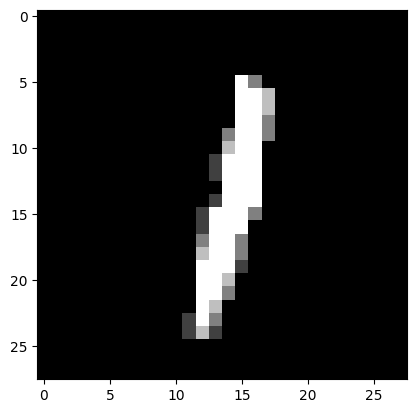

In [21]:
test_prediction(534, W1, b1, W2, b2)

Prediction:  [6]
Label:  6


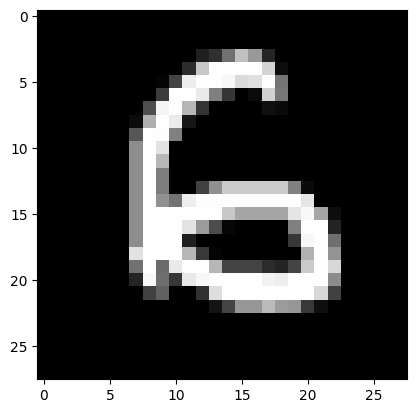

Prediction:  [2]
Label:  2


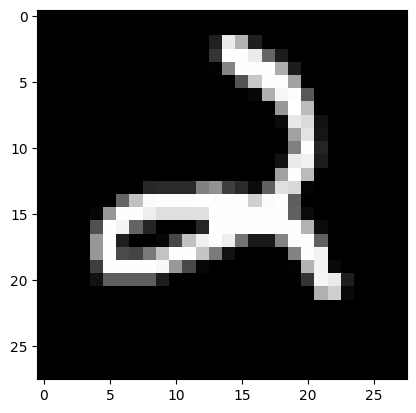

Prediction:  [1]
Label:  1


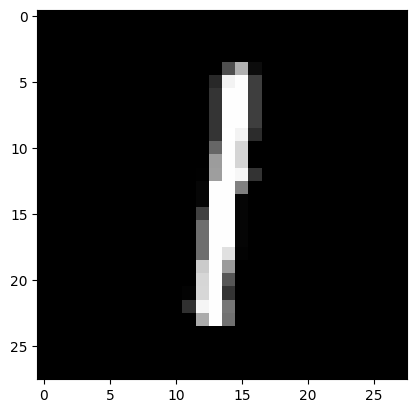

Prediction:  [4]
Label:  4


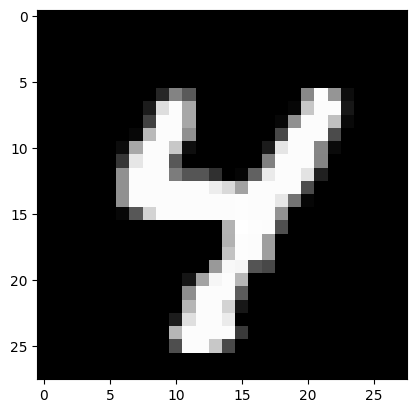

In [19]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)